In [1]:
import sys
quic_path = '/home/quic/QUIC-Projects'
if not quic_path in sys.path:
    sys.path.append(quic_path)

In [2]:
from qasvm.circuits.classifier import QASVM, BlochSphereQASVM, UniformQASVM, UniformBlochQASVM
from qiskit.aqua.components.optimizers import SLSQP, SPSA
from qiskit.circuit.library import TwoLocal, EfficientSU2, RealAmplitudes
from qiskit.aqua.quantum_instance import QuantumInstance
from qiskit.providers.aer import QasmSimulator
from qiskit.providers.ibmq.ibmqbackend import IBMQBackend
from qiskit.circuit import QuantumCircuit, Parameter, ParameterVector
import numpy as np

In [3]:
from qasvm.datasets import Toy2DLinearLoader, Sklearn_DataLoader, Toy2DXORLoader, ToyBlochSphereLoader
from qasvm.preprocessing import DataMultiScaler, DataScaler
from qasvm.classifier import BinarySVM
from qasvm.kernel import Kernel
from sklearn.datasets import make_circles, make_moons, load_breast_cancer
import numpy as np 
from matplotlib import pyplot as plt

In [4]:
from qiskit import IBMQ
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-kaist', group='internal', project='default')
backend = provider.get_backend('ibmq_casablanca')


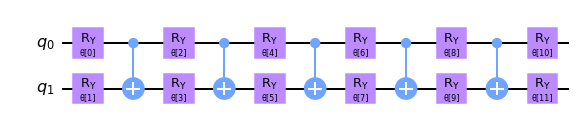

In [5]:
var_form = RealAmplitudes(2, reps=5)
var_form.draw('mpl', fold=-1, filename='./figs/var_form.png')

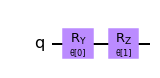

In [6]:
feature_map = TwoLocal(1, ['ry', 'rz'], skip_final_rotation_layer=True, reps=1)
feature_map.draw('mpl', fold=-1, filename='./figs/feature_map.png')

In [7]:
dl = ToyBlochSphereLoader(gap = np.pi/4)
X, y = dl(2**2, noise=0.0)

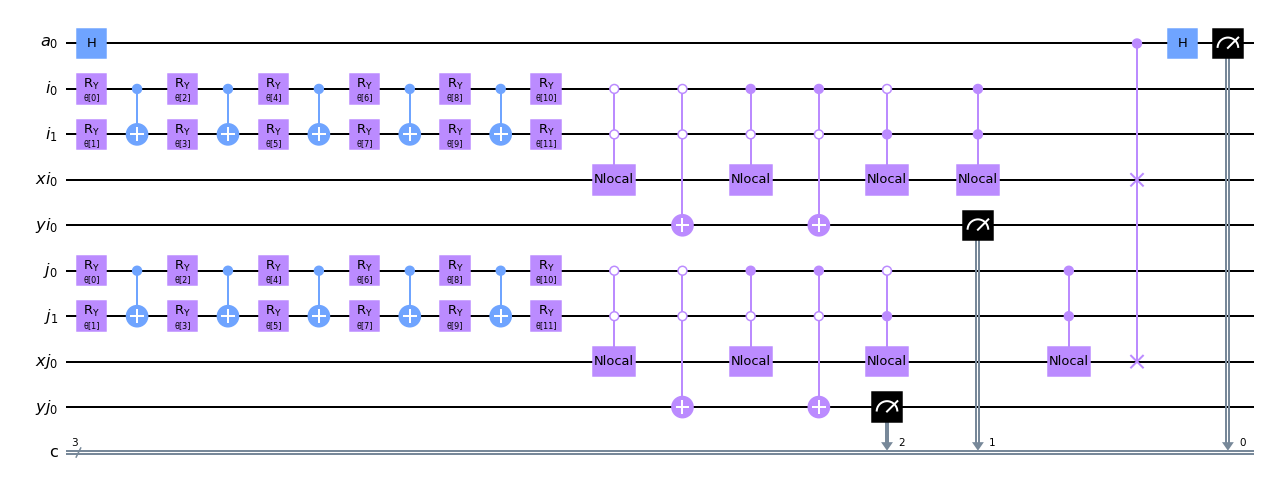

In [8]:
optimizer = SPSA(maxiter=2**10, last_avg=2**5)
quantum_instance = QuantumInstance(backend=QasmSimulator(), shots=2**18)
qasvm = QASVM(var_form=var_form, feature_map=feature_map, optimizer=optimizer, training_data=X, training_label=y, C=None, k=0.1, quantum_instance=quantum_instance).primal

qasvm.second_order_circuit.draw('mpl', fold=-1, filename='./figs/qasvm')

269


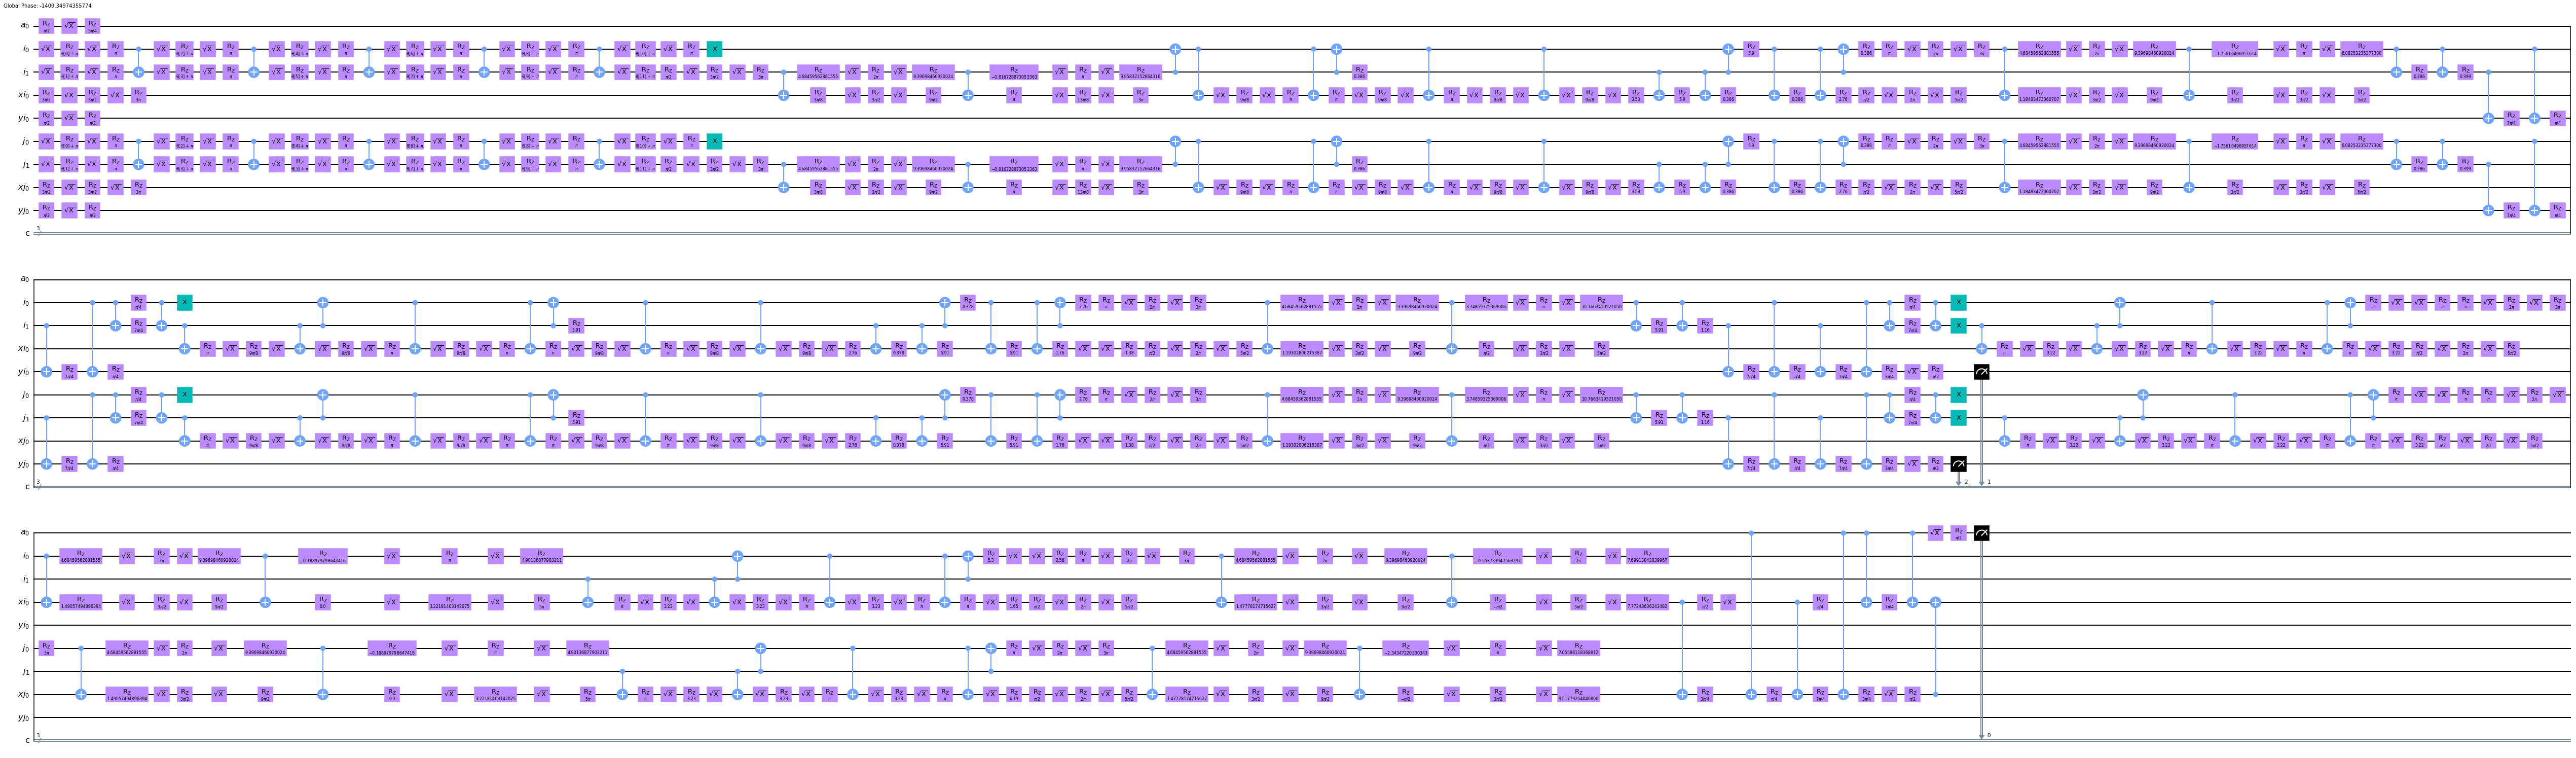

In [9]:
from qiskit import transpile
qc = transpile(qasvm.second_order_circuit, basis_gates=backend.configuration().basis_gates, optimization_level=3)
print(qc.depth())
qc.draw('mpl', fold=110, filename='./figs/qasvm_transpile.png')

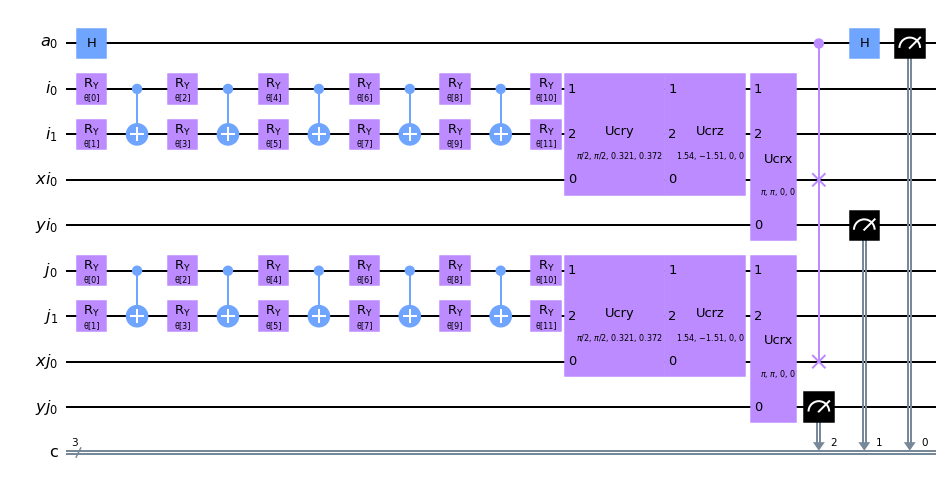

In [10]:
qasvm = BlochSphereQASVM(var_form=var_form, optimizer=optimizer, training_data=X, training_label=y, quantum_instance=quantum_instance, C=None, k=0.1).dual

qasvm.second_order_circuit.draw('mpl', fold=-1, filename='./figs/bloch_qasvm.png')

72


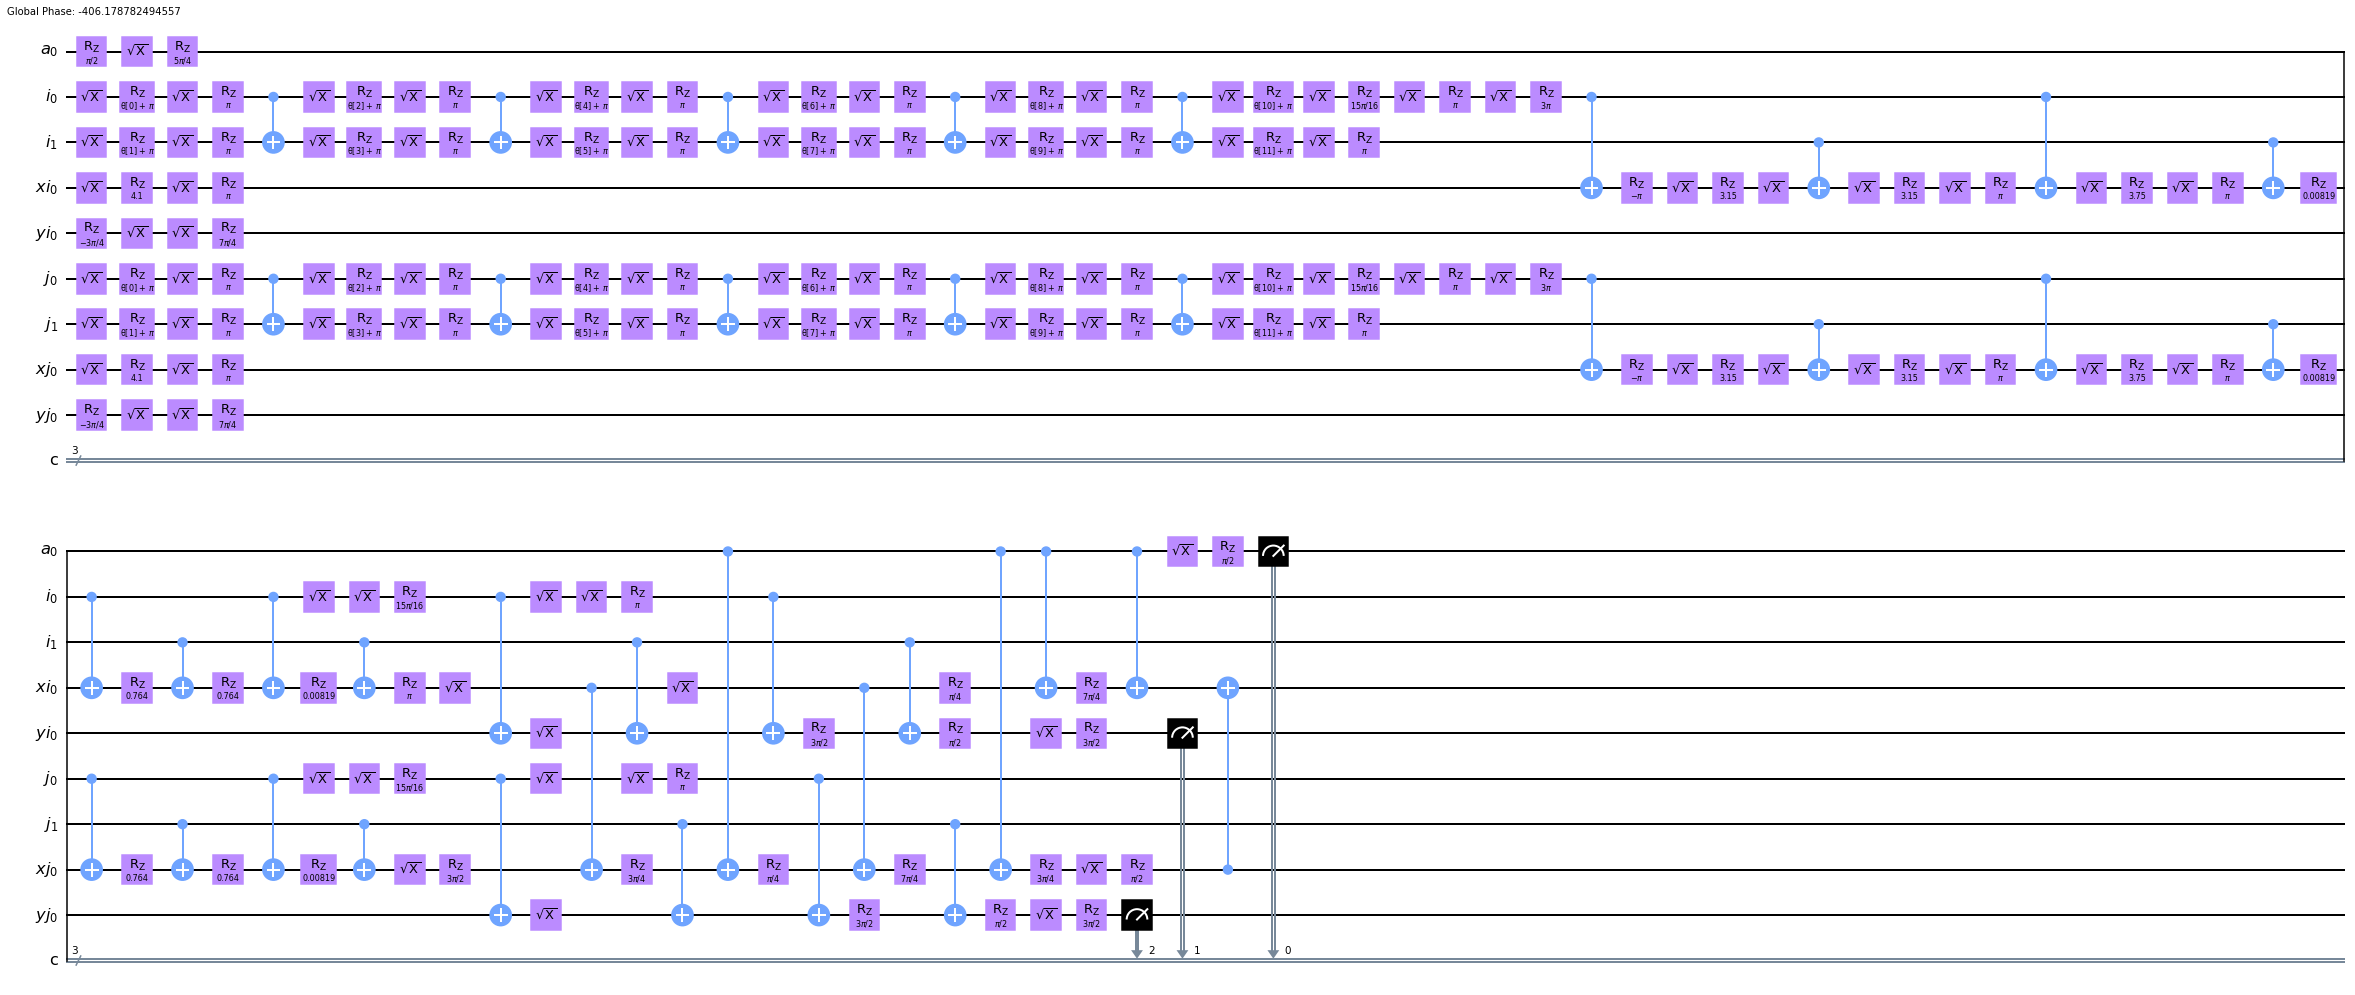

In [11]:
from qiskit import transpile
qc = transpile(qasvm.second_order_circuit, basis_gates=backend.configuration().basis_gates, optimization_level=3)
print(qc.depth())
qc.draw('mpl', fold=50, filename='./figs/bloch_qasvm.transpile.png')

In [12]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx']

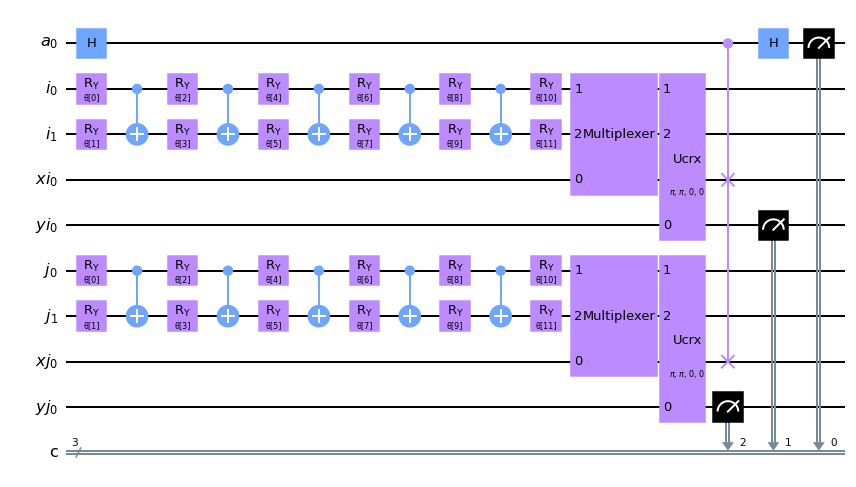

In [13]:
from qasvm.circuits.classifier import _uc_QASVM_circuit
qasvm.circuit_class = _uc_QASVM_circuit
qasvm.dual
qasvm.second_order_circuit.draw('mpl', fold=-1, filename='./figs/uc_qasvm.png')

67


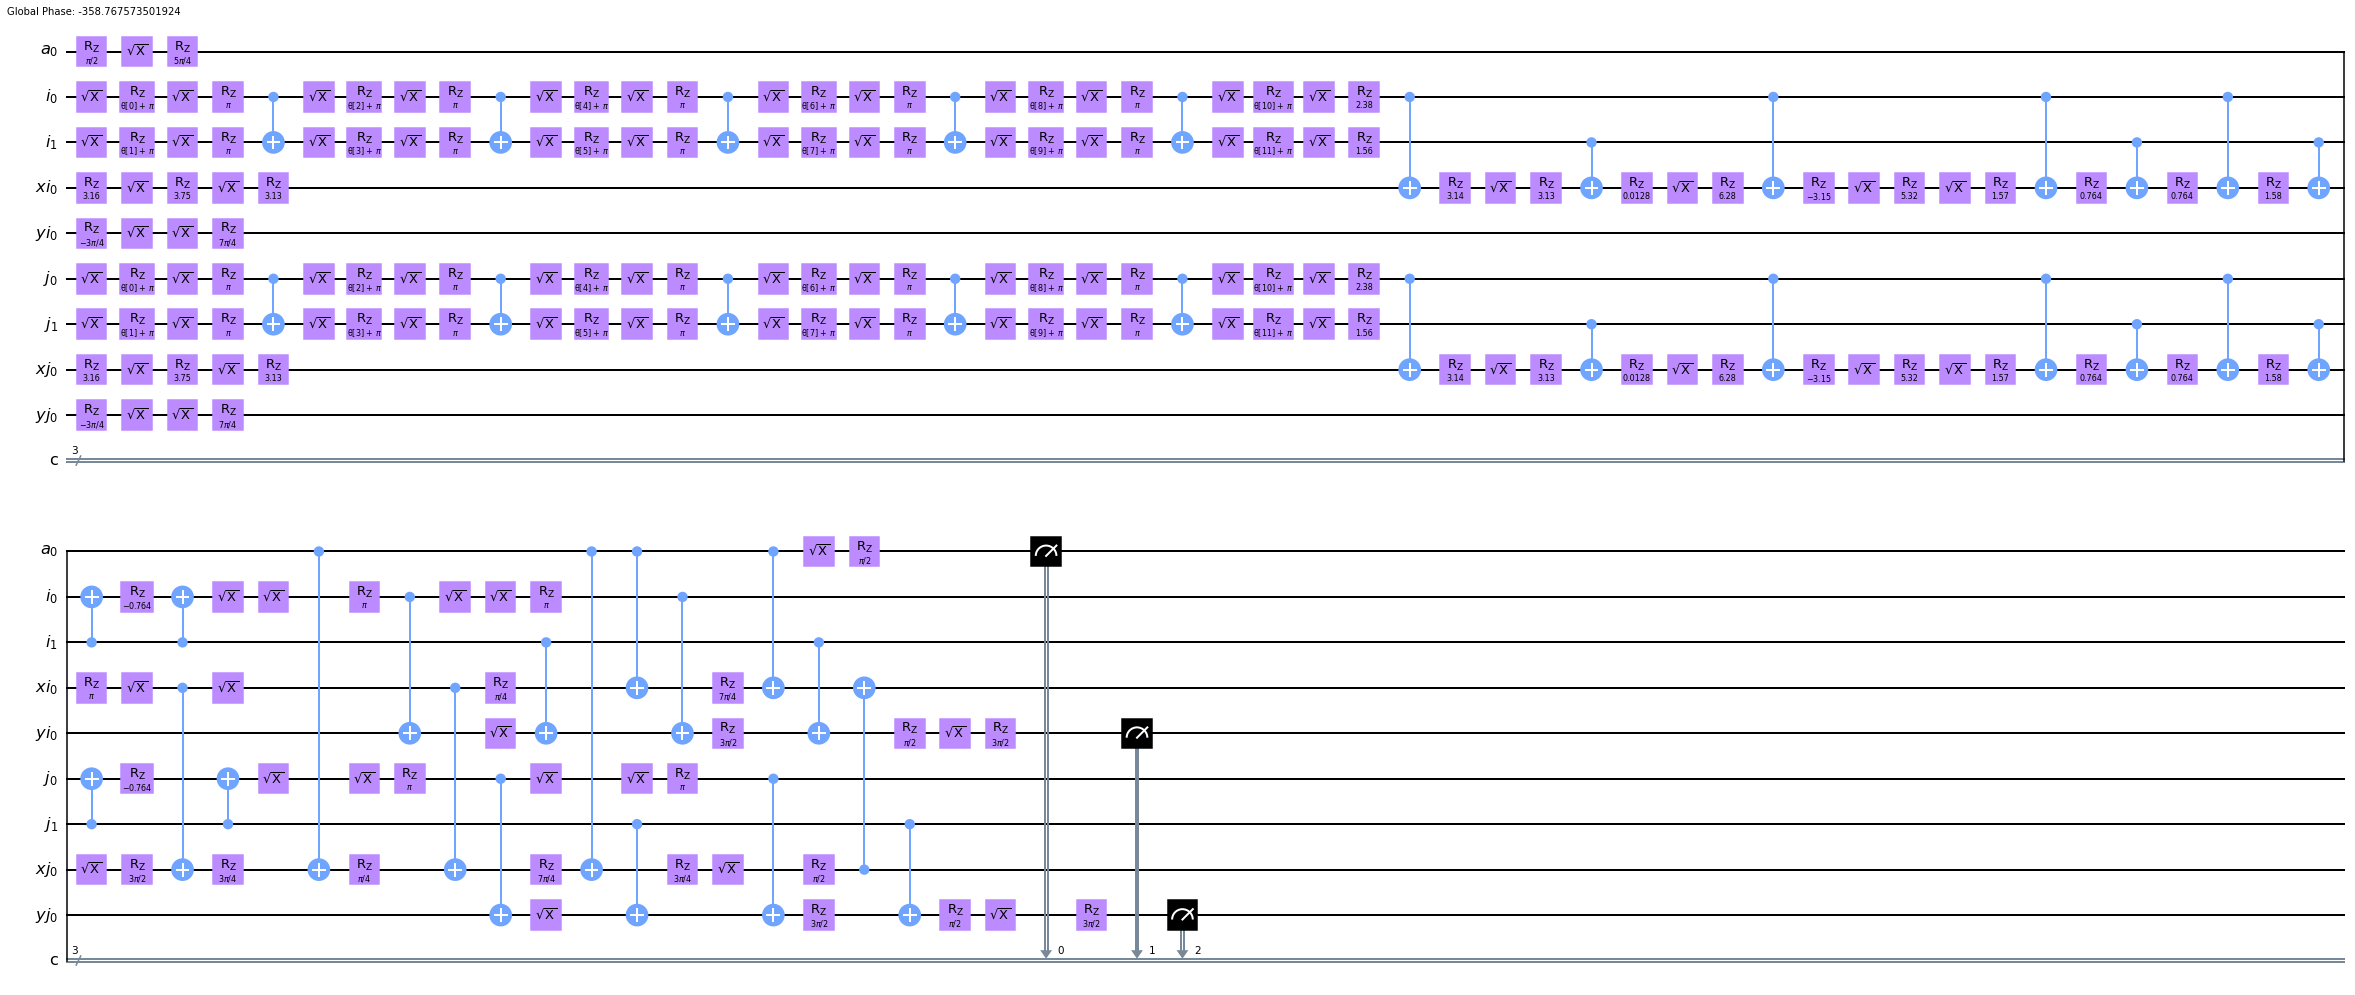

In [14]:
from qiskit import transpile
qc = transpile(qasvm.second_order_circuit, basis_gates=backend.configuration().basis_gates, optimization_level=3)
print(qc.depth())
qc.draw('mpl', fold=50, filename='./figs/uc_qasvm_transpile.png')